## Import Library

In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input
import PIL
import numpy
import os

## Save Dataset on a Array

In [6]:
folder = "dataset_kecil\\"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print(onlyfiles)

train_files = []
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    
data_laporan = numpy.ndarray(shape=(len(train_files), 64, 64, 3), dtype=numpy.float32)

i = 0
for _file in train_files:
#     try:
    im = PIL.Image.open(folder+_file)
    im2 = im.resize((64, 64), PIL.Image.ANTIALIAS)
    img = numpy.array(im2)
    data_laporan[i, :, :, :] = img
    i += 1
    
data_laporan = data_laporan.astype("float32") / 255

['0_1.jpg', '0_10.jpg', '0_11.jpg', '0_12.jpg', '0_13.jpg', '0_14.jpg', '0_15.jpg', '0_16.jpg', '0_17.jpg', '0_18.jpg', '0_19.jpg', '0_2.jpg', '0_20.jpg', '0_21.jpg', '0_22.jpg', '0_23.jpg', '0_24.jpg', '0_25.jpg', '0_26.jpg', '0_27.jpg', '0_28.jpg', '0_29.jpg', '0_3.jpg', '0_30.jpg', '0_4.jpg', '0_5.jpg', '0_6.jpg', '0_7.jpg', '0_8.jpg', '0_9.jpg', '13_6501.jpg', '13_6502.jpg', '13_6503.jpg', '13_6504.jpg', '13_6505.jpg', '13_6506.jpg', '13_6507.jpg', '13_6508.jpg', '13_6509.jpg', '13_6510.jpg', '13_6511.jpg', '13_6512.jpg', '13_6513.jpg', '13_6514.jpg', '13_6515.jpg', '13_6516.jpg', '13_6517.jpg', '13_6518.jpg', '13_6519.jpg', '13_6520.jpg', '13_6521.jpg', '13_6522.jpg', '13_6523.jpg', '13_6524.jpg', '13_6525.jpg', '13_6526.jpg', '13_6527.jpg', '13_6528.jpg', '13_6529.jpg', '13_6530.jpg', '1_501.jpg', '1_502.jpg', '1_503.jpg', '1_504.jpg', '1_505.jpg', '1_506.jpg', '1_507.jpg', '1_508.jpg', '1_509.jpg', '1_510.jpg', '1_511.jpg', '1_512.jpg', '1_513.jpg', '1_514.jpg', '1_515.jpg', '1_

## CNN Layer

In [8]:
dim = 64 # dimensi citra
channels = 3 # channel warna citra
inputs = Input(shape=(dim, dim, channels))

In [9]:
# encoded
encoded = Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu")(inputs)
encoded = MaxPool2D((4, 4))(encoded)
encoded = Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu")(encoded)
encoded = MaxPool2D((2, 2))(encoded)
encoded = Conv2D(1, (3, 3), strides = 1, padding = "same", activation = "relu")(encoded)

# decoded
decoded = Conv2D(1, (3, 3), strides = 1, padding = "same", activation = "relu")(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu")(decoded)
decoded = UpSampling2D((4, 4))(decoded)
decoded = Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu")(decoded)
decoded = Conv2D(3, (3, 3), strides = 1, padding = "same", activation = "sigmoid")(decoded)


In [10]:
# create model autoencoder
autoencoder = Model(inputs=inputs, outputs=decoded)
# create model encoder
encoder = Model(inputs, encoded)

encoding_dim = int(encoder.output.shape[1]) # get encoder dimensi
encoding_channels = int(encoder.output.shape[3]) # get encoder channels

# create decoder layer
encoded_input = Input(shape=(encoding_dim, encoding_dim, encoding_channels))
number_layers_of_encoder = len(encoder.layers)
number_layers_of_autoencoder = len(autoencoder.layers)
decoded_layer = encoded_input
for i in range(number_layers_of_encoder, number_layers_of_autoencoder):
    decoded_layer = autoencoder.layers[i](decoded_layer)

# create model decoder
decoder = Model(encoded_input, decoded_layer)

print(autoencoder.summary())
print(encoder.summary())
print(decoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 1)           577       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 1)           10    

### Training Model

In [11]:
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(data_laporan, data_laporan, epochs=500, batch_size=100, shuffle=True)

autoencoder.save("model_autoencoder.h5")
encoder.save("model_encoder.h5")
decoder.save("model_decoder.h5")

Train on 150 samples
Epoch 1/500
150/150 [==============================] - 3s 21ms/sample - loss: 0.0995
Epoch 2/500
150/150 [==============================] - 3s 18ms/sample - loss: 0.0984
Epoch 3/500
150/150 [==============================] - 3s 18ms/sample - loss: 0.0965
Epoch 4/500
150/150 [==============================] - 3s 19ms/sample - loss: 0.0936
Epoch 5/500
150/150 [==============================] - 3s 19ms/sample - loss: 0.0897
Epoch 6/500
150/150 [==============================] - 3s 18ms/sample - loss: 0.0862
Epoch 7/500
150/150 [==============================] - 4s 24ms/sample - loss: 0.0832
Epoch 8/500
150/150 [==============================] - 3s 21ms/sample - loss: 0.0801
Epoch 9/500
100/150 [===================>..........] - ETA: 1s

KeyboardInterrupt: 

## Show Features

In [4]:
from tensorflow.keras.models import load_model

model = load_model('./model_encoder.h5')

Citra Asli


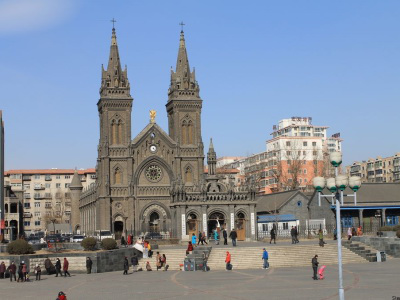

Citra dengan ukuran 64x64


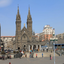

Fitur Citra Hasil Ekstraksi dengan Ukuran 8x8


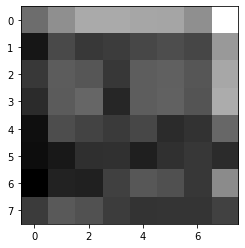

In [16]:
import matplotlib.pyplot as plt

path_image = "./dataset_kecil/1_501.jpg"
print("Citra Asli")
image = PIL.Image.open(path_image)
display(image)
print("Citra dengan ukuran 64x64")
image = image.resize((64, 64), PIL.Image.ANTIALIAS)
display(image)
print("Fitur Citra Hasil Ekstraksi dengan Ukuran 8x8")
arr_image = numpy.array(image).astype('float32') / 255
arr_image = arr_image.reshape(1, arr_image.shape[0], arr_image.shape[1], arr_image.shape[2]) # (1,64,64,3)
feature_image = model.predict(arr_image)
feature_image = feature_image.reshape(feature_image.shape[1], feature_image.shape[2])
plt.imshow(feature_image, cmap='gray')